In [344]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Medicaldataset.csv')
df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
7,63,1,60,214,82,87.0,300.00,2.370,positive
8,44,0,60,154,81,135.0,2.35,0.004,negative
9,67,1,61,160,95,100.0,2.84,0.011,negative


In [345]:
df.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [347]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [348]:
null = df.isnull().sum()
ratio  = null /df.shape[0]
n_unique = df.nunique()
info = pd.DataFrame({'null':null,'ratio':ratio,'n_unique':n_unique})
info.T

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n_unique,75.0,2.0,79.0,116.0,73.0,244.0,700.0,352.0,2.0


In [349]:
df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})
df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
5,58,0,61,112,58,87.0,1.83,0.004,0
6,32,0,40,179,68,102.0,0.71,0.003,0
7,63,1,60,214,82,87.0,300.00,2.370,1
8,44,0,60,154,81,135.0,2.35,0.004,0
9,67,1,61,160,95,100.0,2.84,0.011,0


In [350]:
# توليد أعمدة جديدة
df['Pulse_Pressure'] = df['Systolic blood pressure'] - df['Diastolic blood pressure']
df['MAP'] = df['Diastolic blood pressure'] + (1/3 * df['Pulse_Pressure'])
df['Is_Elderly'] = df['Age'] >= 60
df['Is_High_Sugar'] = df['Blood sugar'] > 200
df['Gender_Label'] = df['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')
df['Cardiac_Risk_Score'] = df['CK-MB'] + df['Troponin'] + (df['Heart rate'] / 100)

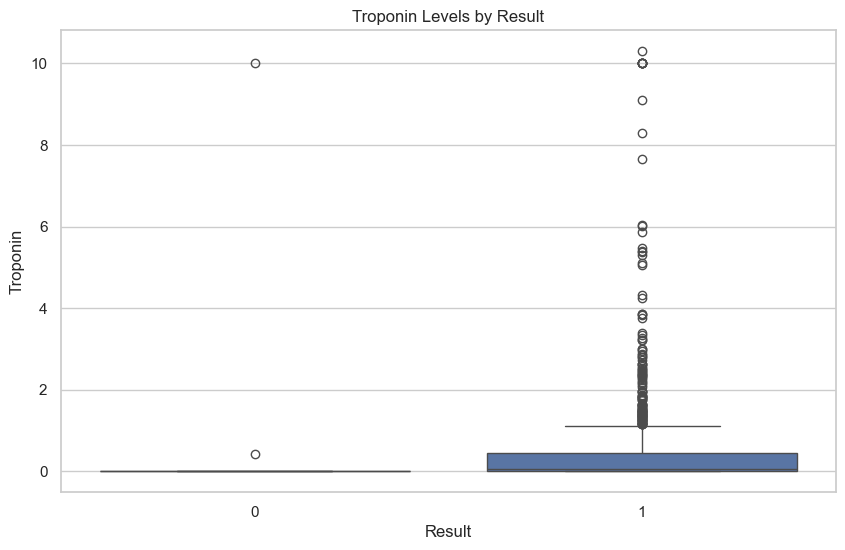

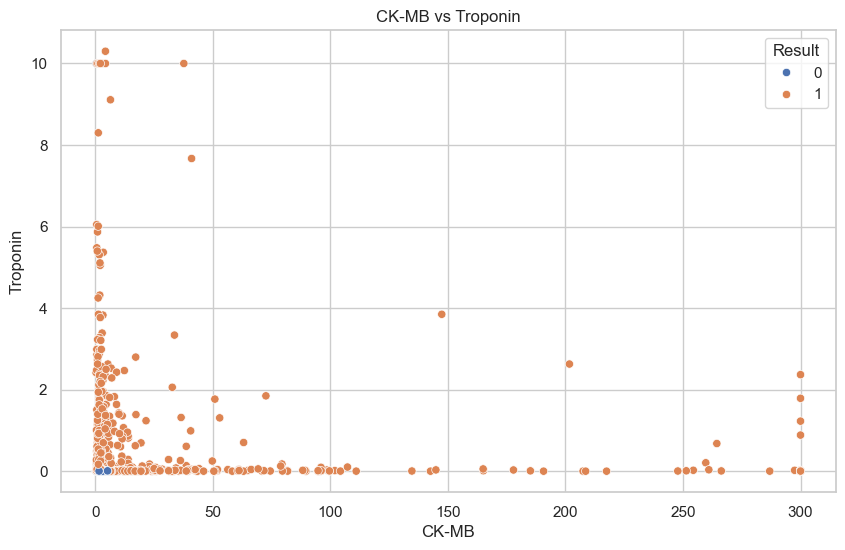

In [351]:
# توزيع Troponin حسب النتيجة
sns.boxplot(x='Result', y='Troponin', data=df)
plt.title('Troponin Levels by Result')
plt.show()

# العلاقة بين CK-MB و Troponin
sns.scatterplot(x='CK-MB', y='Troponin', hue='Result', data=df)
plt.title('CK-MB vs Troponin')
plt.show()

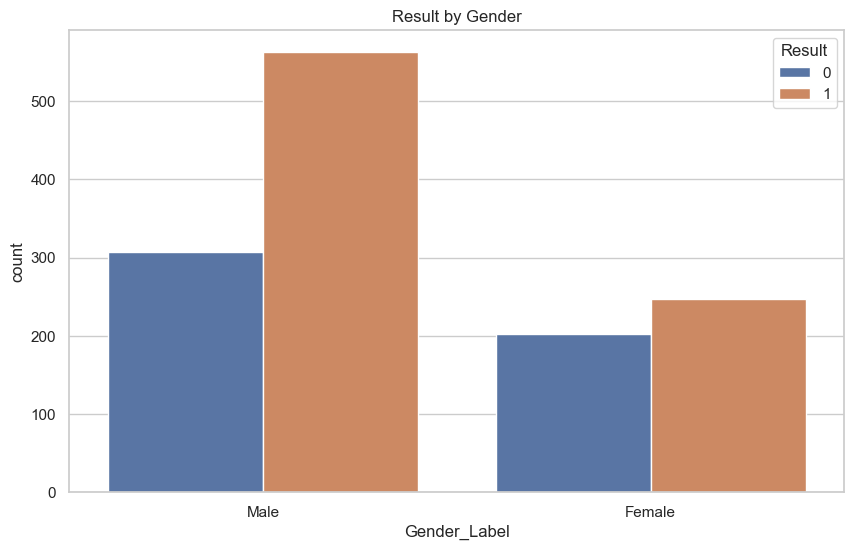

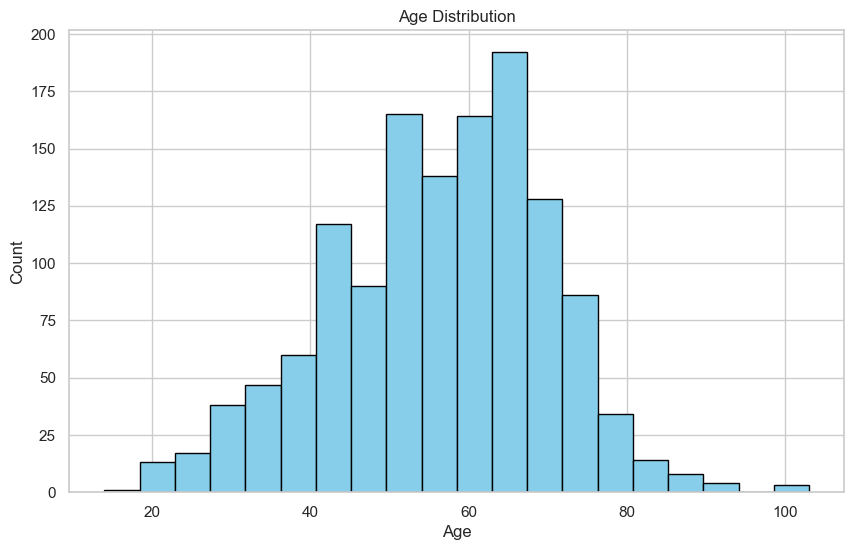

In [352]:
# عدد الحالات حسب النوع والنتيجة
sns.countplot(x='Gender_Label', hue='Result', data=df)
plt.title('Result by Gender')
plt.show()

# توزيع العمر
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [353]:
# اختيار الأعمدة
features = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
            'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
X = df[features]
y = df['Result']

# تقسيم وتدريب النموذج
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# تقييم
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.803030303030303
Confusion Matrix:
 [[ 73  28]
 [ 24 139]]


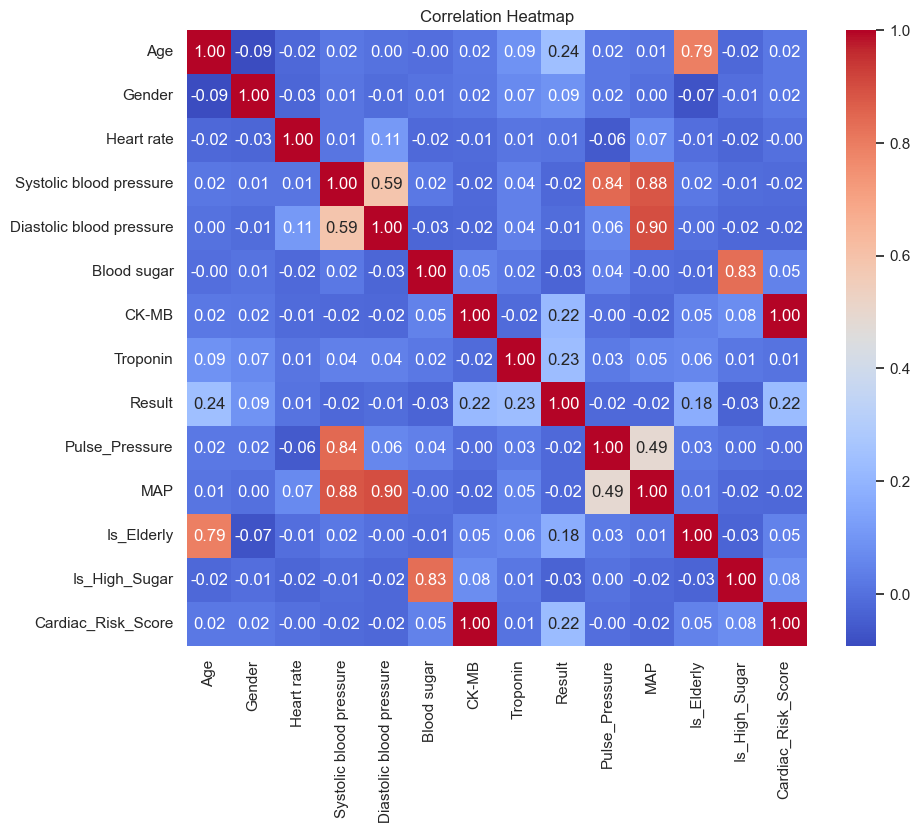

In [354]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

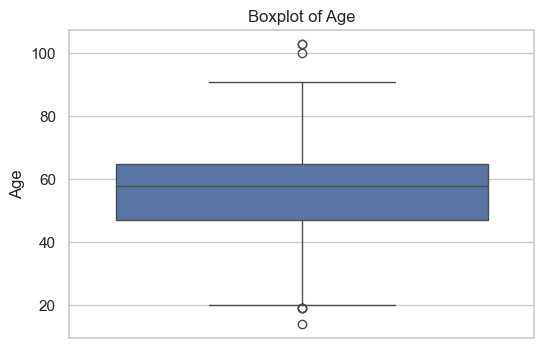

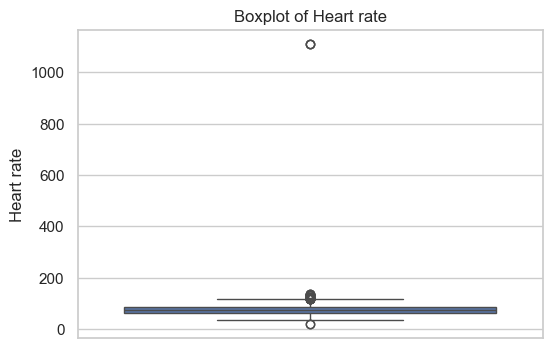

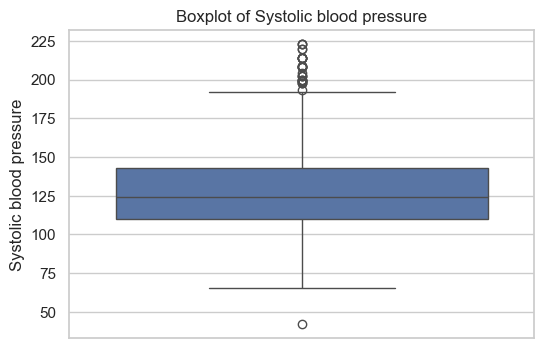

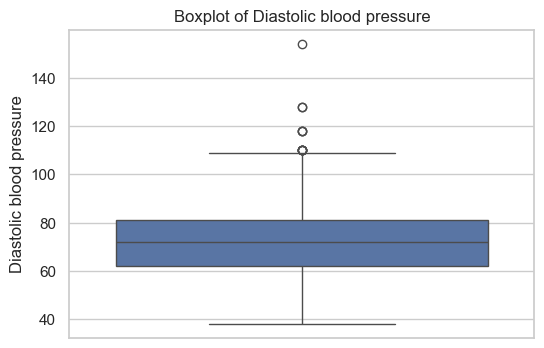

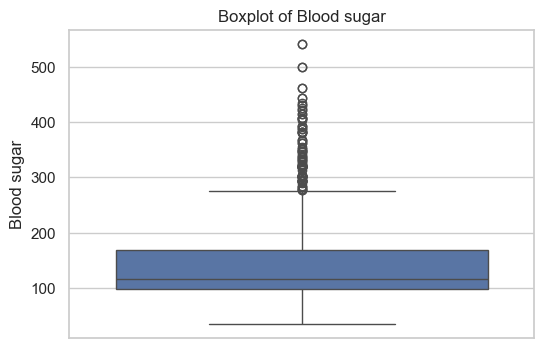

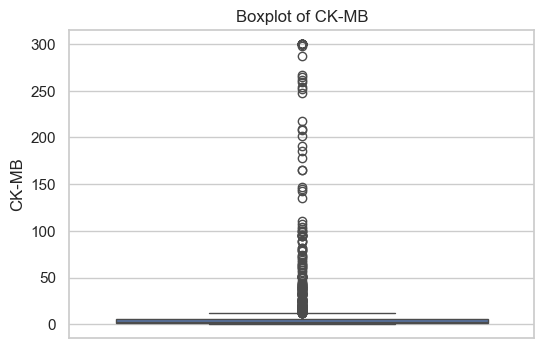

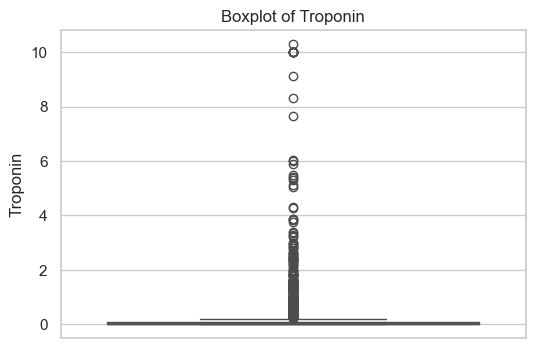

In [355]:
numerical_columns = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
                     'Blood sugar', 'CK-MB', 'Troponin']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

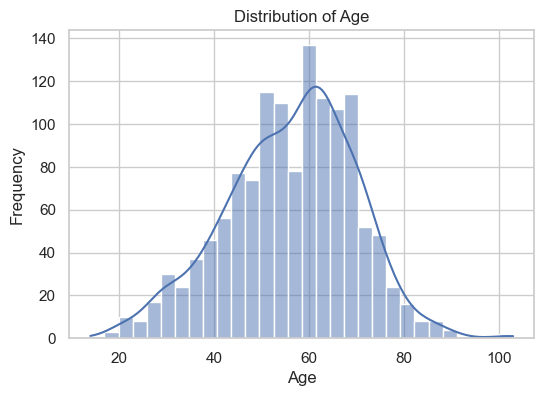

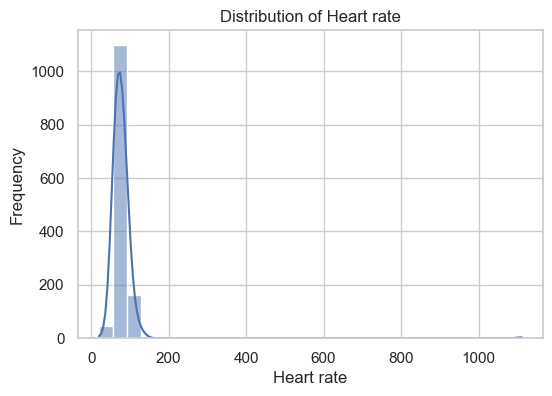

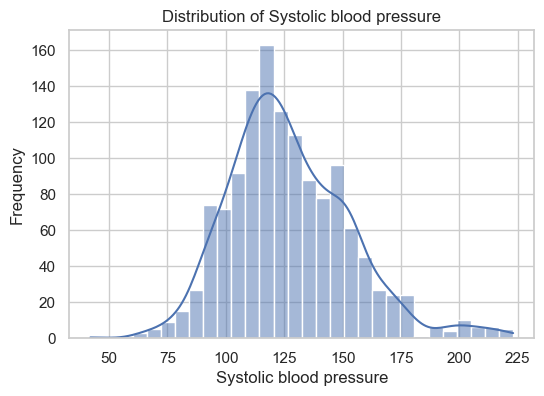

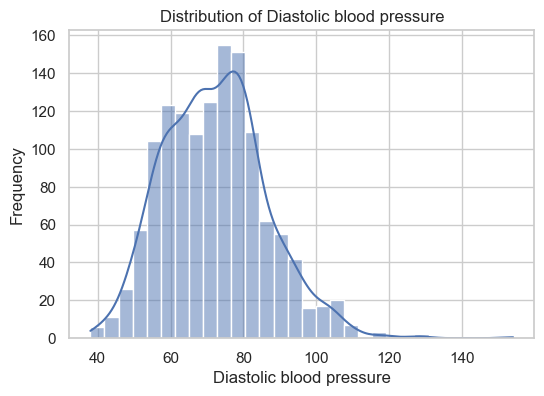

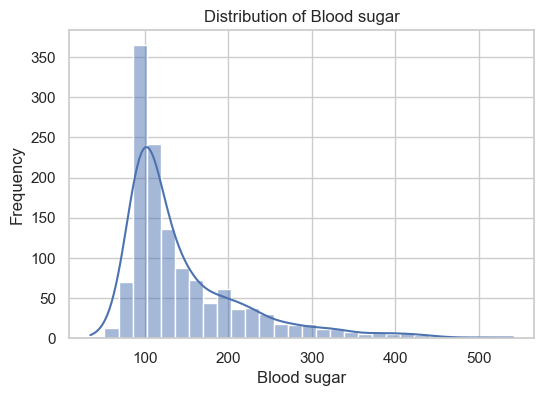

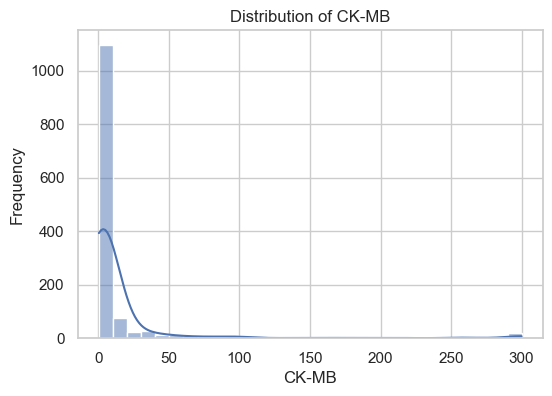

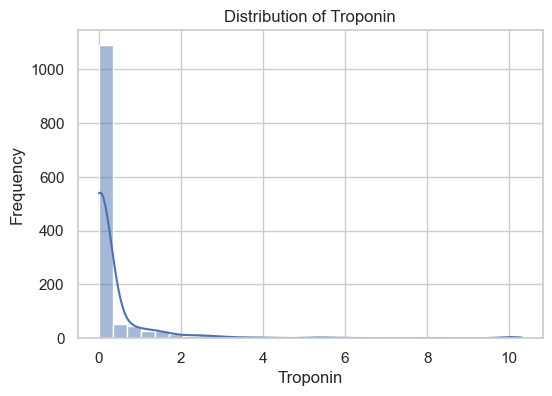

In [356]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

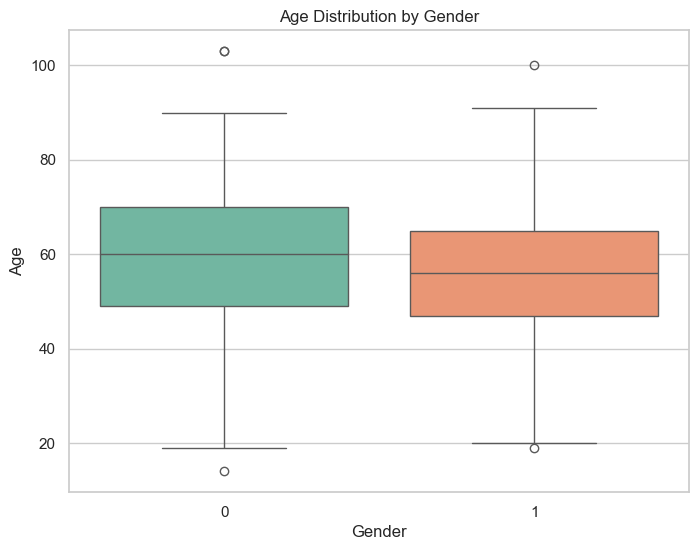

In [357]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [358]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [359]:
numeric_cols = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
                'Blood sugar', 'CK-MB', 'Troponin']
data_cleaned = remove_outliers_iqr(df, numeric_cols)

print("Original shape:", df.shape)
print("Cleaned shape:", data_cleaned.shape)

Original shape: (1319, 15)
Cleaned shape: (788, 15)


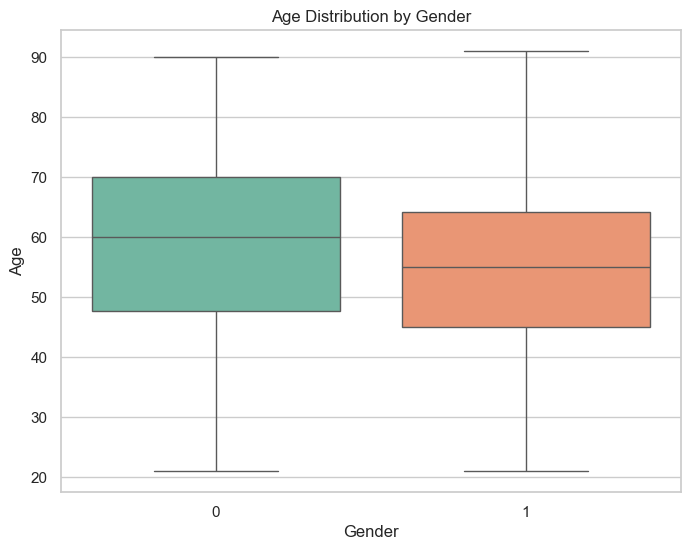

In [360]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=data_cleaned, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

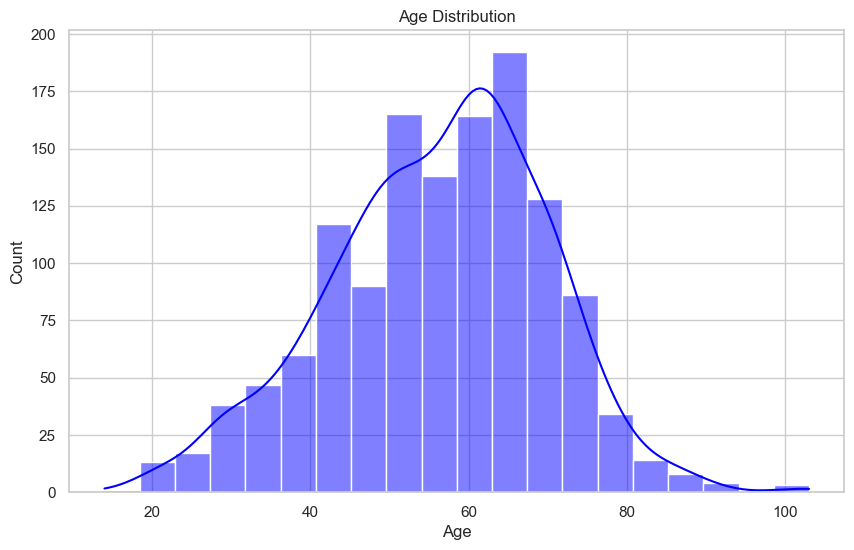

In [361]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Distribution of Age

sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

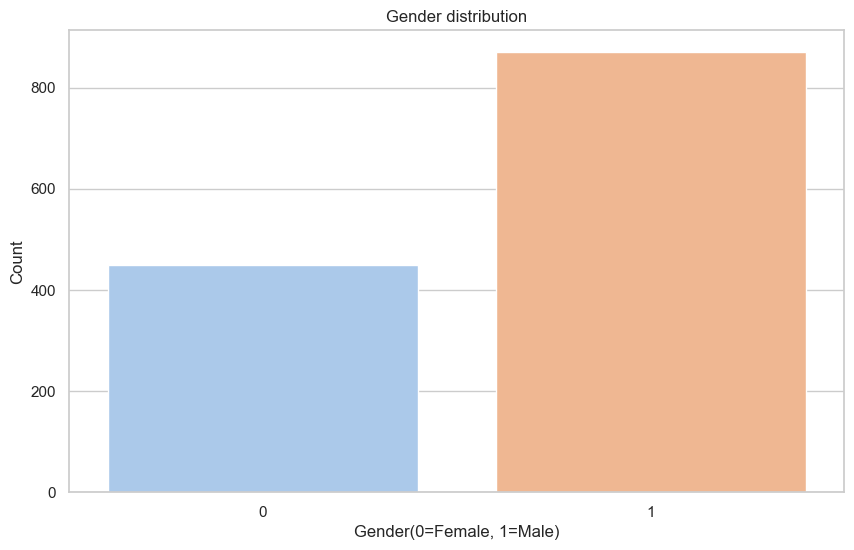

In [362]:
sns.countplot(x = 'Gender', data = df, palette = 'pastel')
plt.title('Gender distribution')
plt.xlabel('Gender(0=Female, 1=Male)')
plt.ylabel('Count')
plt.show()

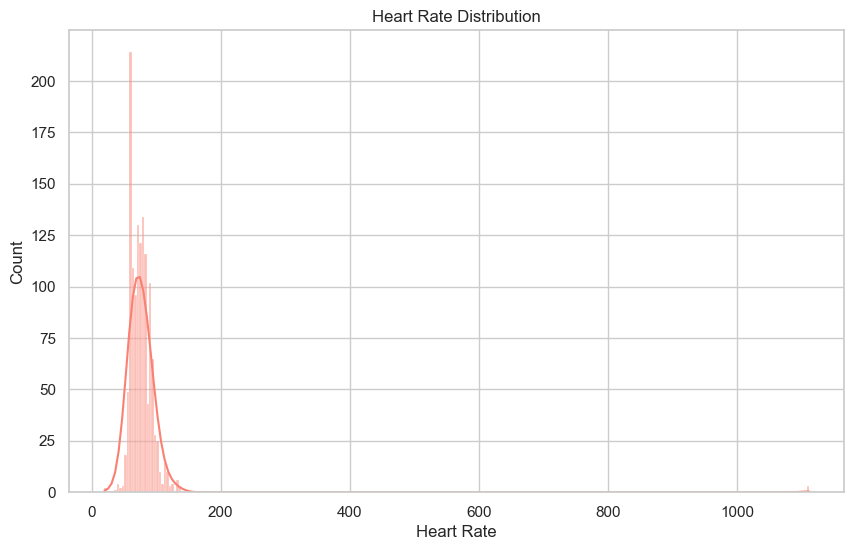

In [363]:
sns.histplot(df['Heart rate'], kde=True, color='salmon')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.show()

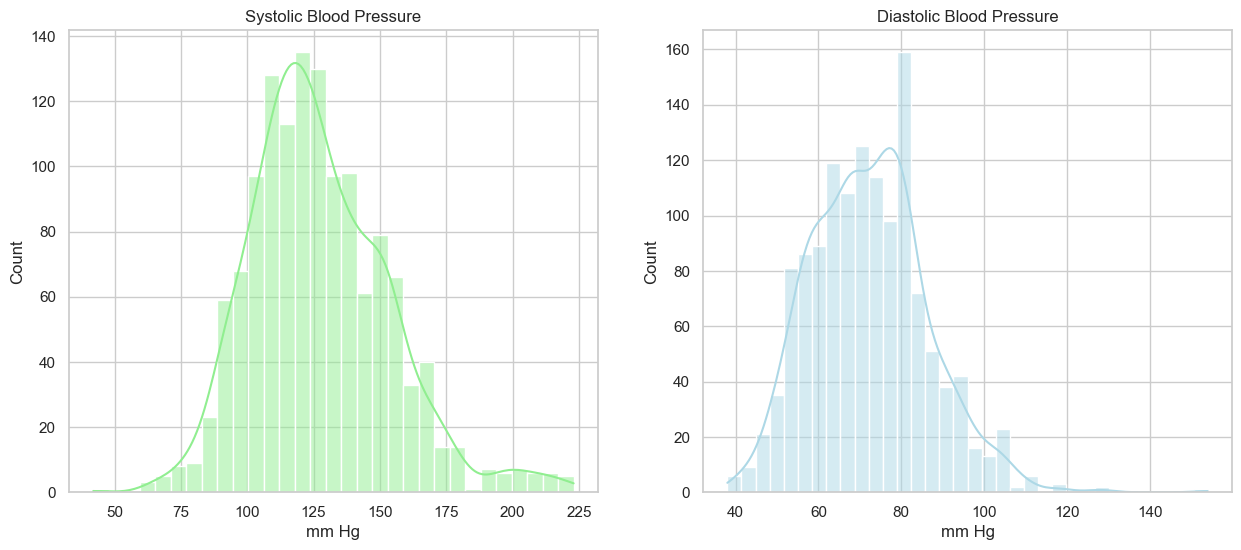

In [364]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['Systolic blood pressure'], kde=True, ax=ax[0], color='lightgreen')
ax[0].set_title('Systolic Blood Pressure')
ax[0].set_xlabel('mm Hg')
sns.histplot(df['Diastolic blood pressure'], kde=True, ax=ax[1], color='lightblue')
ax[1].set_title('Diastolic Blood Pressure')
ax[1].set_xlabel('mm Hg')
plt.show()

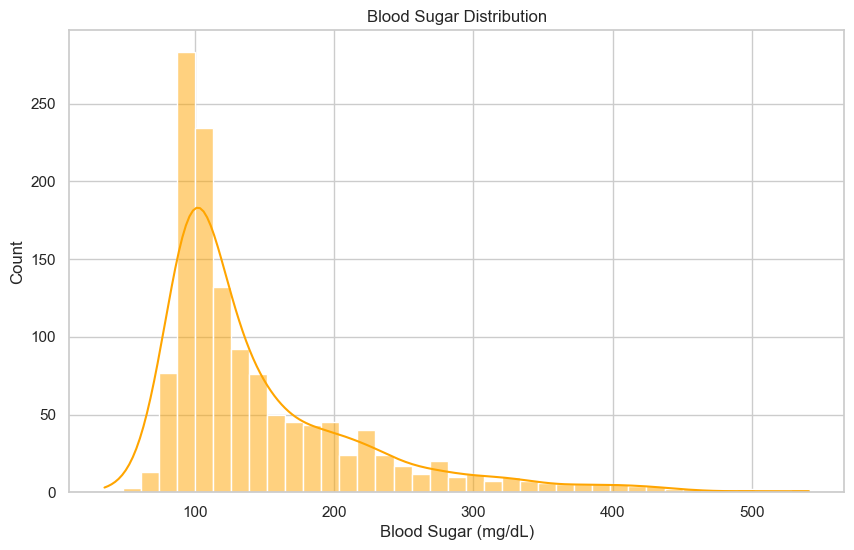

In [365]:
sns.histplot(df['Blood sugar'], kde=True, color='orange')
plt.title('Blood Sugar Distribution')
plt.xlabel('Blood Sugar (mg/dL)')
plt.ylabel('Count')
plt.show()

###### X = data_cleaned.drop('Result', axis=1)
###### y = data_cleaned['Result']
###### scaler = StandardScaler()
###### X_scaled = scaler.fit_transform(X)
###### X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

###### model = LogisticRegression()
###### model.fit(X_train, y_train)
###### y_pred = model.predict(X_test)

###### print("Accuracy:", accuracy_score(y_test, y_pred))
###### print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))333

In [366]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from scipy.optimize import differential_evolution
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Convert Gender_Label to numerical values
df['Gender'] = df['Gender_Label'].map({'Male': 1, 'Female': 0})

X = df.drop(columns=['Result', 'Gender_Label'])
y = df['Result']

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit_predict(X)
df['SpectralCluster'] = spectral

kmeans = KMeans(n_clusters=2, random_state=42).fit_predict(X)
df['KMeansCluster'] = kmeans

gmm = GaussianMixture(n_components=2, random_state=42).fit_predict(X)
df['GMMCluster'] = gmm

print(df[['Result', 'SpectralCluster', 'KMeansCluster', 'GMMCluster']].head())

   Result  SpectralCluster  KMeansCluster  GMMCluster
0       0                0              0           0
1       1                1              1           1
2       0                1              1           1
3       1                1              1           1
4       0                1              1           1


In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

print(y_train.unique())

y_pred = log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")  

[1 0]
Confusion Matrix:
[[111  44]
 [ 34 207]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       155
           1       0.82      0.86      0.84       241

    accuracy                           0.80       396
   macro avg       0.80      0.79      0.79       396
weighted avg       0.80      0.80      0.80       396

F1 Score: 0.8414634146341463


In [368]:
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='optimal', random_state=42)

sgd_model.fit(X_train, y_train)

y_pred_sgd = sgd_model.predict(X_test)

print("Confusion Matrix (SGD):")
print(confusion_matrix(y_test, y_pred_sgd))
print("\nClassification Report (SGD):")
print(classification_report(y_test, y_pred_sgd))
print(f"F1 Score (SGD): {f1_score(y_test, y_pred_sgd)}")

Confusion Matrix (SGD):
[[ 35 120]
 [  9 232]]

Classification Report (SGD):
              precision    recall  f1-score   support

           0       0.80      0.23      0.35       155
           1       0.66      0.96      0.78       241

    accuracy                           0.67       396
   macro avg       0.73      0.59      0.57       396
weighted avg       0.71      0.67      0.61       396

F1 Score (SGD): 0.7824620573355818


In [369]:
print(X.isnull().sum())  
print(y.isnull().sum())  
print(X.shape)  
print(y.shape)  

def fitness_function(params):
    C = params[0]  
    max_iter = int(params[1])  
    
    model = LogisticRegression(C=C, max_iter=max_iter, solver='lbfgs')
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    return -f1_score(y_test, y_pred)  

bounds = [(0.01, 10), (100, 1000)]

X = df.drop(columns=['Result', 'Gender_Label'])  # Drop Gender_Label
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

result = differential_evolution(fitness_function, bounds, maxiter=10, disp=True)

best_C, best_max_iter = result.x
print(f"Best parameters found: C = {best_C}, max_iter = {best_max_iter}")

final_model = LogisticRegression(C=best_C, max_iter=int(best_max_iter), solver='lbfgs')
final_model.fit(X_train_scaled, y_train)

y_pred_ga = final_model.predict(X_test_scaled)

print("\nConfusion Matrix (Genetic Algorithm):")
print(confusion_matrix(y_test, y_pred_ga))

print("\nClassification Report (Genetic Algorithm):")
print(classification_report(y_test, y_pred_ga))

print(f"F1 Score (Genetic Algorithm): {f1_score(y_test, y_pred_ga)}")

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Pulse_Pressure              0
MAP                         0
Is_Elderly                  0
Is_High_Sugar               0
Cardiac_Risk_Score          0
dtype: int64
0
(1319, 13)
(1319,)
differential_evolution step 1: f(x)= -0.859504132231405
Polishing solution with 'L-BFGS-B'
Best parameters found: C = 9.106660084128883, max_iter = 910.786323752767

Confusion Matrix (Genetic Algorithm):
[[120  35]
 [ 33 208]]

Classification Report (Genetic Algorithm):
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       155
           1       0.86      0.86      0.86       241

    accuracy                           0.83       396
   macro avg       0.82      0.82      0.82       396
weighted avg       0.83      0.83

Unique values in y: [0 1]
=== Logistic Regression (базова модель) ===
Confusion Matrix:
[[109  44]
 [ 47 196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       153
           1       0.82      0.81      0.81       243

    accuracy                           0.77       396
   macro avg       0.76      0.76      0.76       396
weighted avg       0.77      0.77      0.77       396

F1 Score: 0.8115942028985508


=== Logistic Regression (градієнтний спуск) ===
Confusion Matrix:
[[ 98  55]
 [ 39 204]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       153
           1       0.79      0.84      0.81       243

    accuracy                           0.76       396
   macro avg       0.75      0.74      0.74       396
weighted avg       0.76      0.76      0.76       396

F1 Score: 0.8127490039840638


=== Logistic Regression (генетичний 

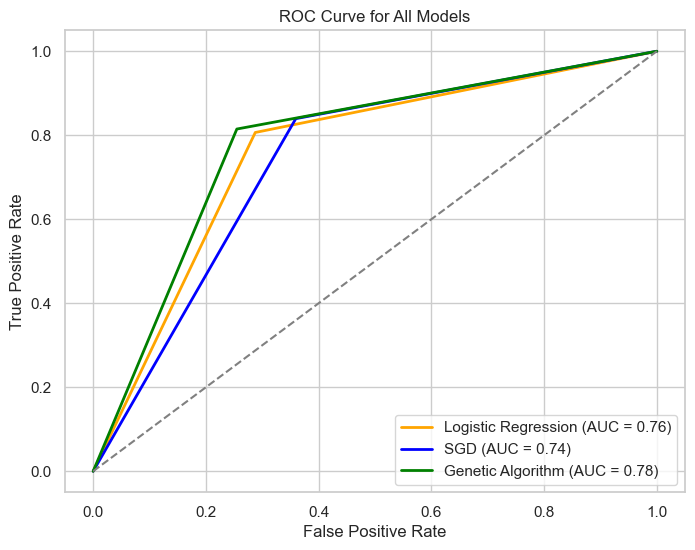

In [370]:
X = df.drop(columns=['Result', 'Gender_Label'])  
y = df['Result']  

# Check unique values in y before splitting
print("Unique values in y:", y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(max_iter=2000, solver='lbfgs').fit(X_train_scaled, y_train)
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000).fit(X_train_scaled, y_train)

final_model = LogisticRegression(C=best_C, max_iter=int(best_max_iter), solver='lbfgs').fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)
y_pred_sgd = sgd_model.predict(X_test_scaled)
y_pred_ga = final_model.predict(X_test_scaled)

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred)
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_pred_sgd)
fpr_ga, tpr_ga, _ = roc_curve(y_test, y_pred_ga)

roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)
roc_auc_ga = auc(fpr_ga, tpr_ga)

print("=== Logistic Regression (базова модель) ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print("\n" + "="*50 + "\n")

print("=== Logistic Regression (градієнтний спуск) ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sgd))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sgd))
print(f"F1 Score: {f1_score(y_test, y_pred_sgd)}")
print("\n" + "="*50 + "\n")

print("=== Logistic Regression (генетичний алгоритм) ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ga))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ga))
print(f"F1 Score: {f1_score(y_test, y_pred_ga)}")
print("\n" + "="*50 + "\n")

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_sgd, tpr_sgd, color='blue', lw=2, label=f'SGD (AUC = {roc_auc_sgd:.2f})')
plt.plot(fpr_ga, tpr_ga, color='green', lw=2, label=f'Genetic Algorithm (AUC = {roc_auc_ga:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()